In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import math
from sklearn import linear_model
from matplotlib import animation
import numpy as np

In [2]:
file = os.path.join(os.getcwd(), '../ballpositions.csv')

# Load data into array
print('load into array...')
data = []
with open(file, 'r') as f:
    for i, row in enumerate(f):
        data = data + [row]
        
#/home/lea/Dokumente/FSU/Anwendungspraktikum/cvtennis/code/../../Videos/GoPro/GoProFrames

load into array...


In [3]:
# Keep only Kerber Halep video

path = '../../Videos/GoPro/GoProFrames/3_image_GP_00002.png'
image = plt.imread(os.path.join(os.getcwd(), path))

ballpos = np.array([])
for i in range(4756, len(data)):
    row = data[i]
    row = row.replace('    ', ' ')
    row = row.replace('   ', ' ')
    row = row.replace('  ', ' ')
    path, bb, ac, lb, mx = row.split(';')
    b1, b2, b3, b4 = [x.strip('[]') for x in bb.split(' ')[0:4]]
    b1, b3 = float(b1) * image.shape[0], float(b3) * image.shape[0]
    b2, b4 = float(b2) * image.shape[1], float(b4) * image.shape[1]
    accuracy = float(ac.split(' ')[0].strip('[]'))
    ballpos = np.append(ballpos, [i-4756, (b2+b4)/2, (b1+b3)/2, accuracy])
    
ballpos = ballpos.reshape(-1,4)
images = ballpos[:,0]

In [4]:
framerate = 25
maxspeed_km_h = 160 #(263km/h)
maxspeed_km_sec = maxspeed_km_h / 60 / 60
maxspeed_m_sec = maxspeed_km_sec * 1000
maxdist_m_frame = maxspeed_m_sec / framerate
#Get number of pixels
#Conservative assumption: ball moves orthogonal to optical axis at the opposite court side close to the net
#use outer serve line points as reference distance
x_pxl = [535, 1270]
y_pxl = [640, 374]
dx = x_pxl[1] - x_pxl[0]
dy = y_pxl[0] - y_pxl[1]
physical_dist_m = 2 * np.sqrt(np.sqrt(((9.6-1.37)/2)**2 + ((18.28-5.48) / 2)**2)**2 + 0.914**2)

maxdist_frame_x_pxl = maxdist_m_frame / physical_dist_m * dx
maxdist_frame_y_pxl =  maxdist_m_frame / physical_dist_m * dy
mdist_pxl = int(np.sqrt(maxdist_frame_x_pxl**2 + maxdist_frame_y_pxl**2))
print('Maximum distance of ball within one frame (x, y, both)' , maxdist_frame_x_pxl, maxdist_frame_y_pxl, np.sqrt(maxdist_frame_x_pxl**2 + maxdist_frame_y_pxl**2))

Maximum distance of ball within one frame (x, y, both) 85.2530479918 30.8534840351 90.6643241247


In [5]:
smpos = []#ballpos.copy()
ThesBallDetection = 0.02
for pos in range(1, len(ballpos)-1):
    framecount1 = 1
    framecount2 = 1
    cond2 = np.linalg.norm(ballpos[pos, 1:3]-ballpos[pos-1, 1:3]) < mdist_pxl and np.linalg.norm(ballpos[pos+1, 1:3]-ballpos[pos, 1:3]) < mdist_pxl
    if ballpos[pos, 3] > ThesBallDetection and cond2:
        j1 = pos-1
        j2 = pos+1
        dist1 = np.linalg.norm(ballpos[pos, 1:3]-ballpos[j1, 1:3])
        dist2 = np.linalg.norm(ballpos[j2, 1:3]-ballpos[pos, 1:3])
        while ballpos[j1, 3] < ThesBallDetection or dist1 > framecount1 * mdist_pxl:
            framecount1 += 1
            j1 -= 1
            if j1 <= 0:
                j1 = None
                dist1 = None
                break
            else:
                dist1 = np.linalg.norm(ballpos[pos, 1:3]-ballpos[j1, 1:3])                
        while ballpos[j2, 3] < ThesBallDetection or dist2 > framecount2 * mdist_pxl:
            j2 += 1
            framecount2 += 1
            if j2 >= len(ballpos):
                j2 = None
                dist2 = None
                break
            else:
                dist2 = np.linalg.norm(ballpos[pos, 1:3]-ballpos[j2, 1:3])
        if j1 != None and j2 != None and dist1 != None and dist2 != None:
            smpos += [ballpos[pos,0], np.mean(ballpos[[j1,pos,j2], 1:3], axis=0)[0], np.mean(ballpos[[j1,pos,j2], 1:3], axis=0)[1], ballpos[pos,3]]
            #smpos[pos, 1:3] = np.mean(ballpos[[j1,pos,j2], 1:3], axis=0)        
smpos = np.array(smpos).reshape(-1,4)

(array([241]),)
(array([242]),)
(array([243]),)
(array([244]),)
(array([245]),)
(array([246]),)
(array([247]),)
(array([248]),)
(array([249]),)
(array([250]),)
(array([251]),)
(array([252]),)
(array([253]),)
(array([254]),)
(array([255]),)
(array([256]),)
(array([257]),)
(array([258]),)
(array([259]),)
(array([260]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([261]),)
(array([262]),)
(array([263]),)
(array([264]),)
(array([265]),)
(array([266]),)
(array([267]),)
(array([268]),)
(array([269]),)
(array([270]),)
(array([271]),)
(array([272]),)
(array([273]),)
(array([274]),)
(array([275]),)
(array([276]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([277]),)
(array([278]),)
(array([279]),)
(array([280]),)
(array([281]),)
(array([282]),)
(array([283]),)
(array([284]),)
(array([285]),)
(array([286]),)
(array([287]),)
(array([288]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),

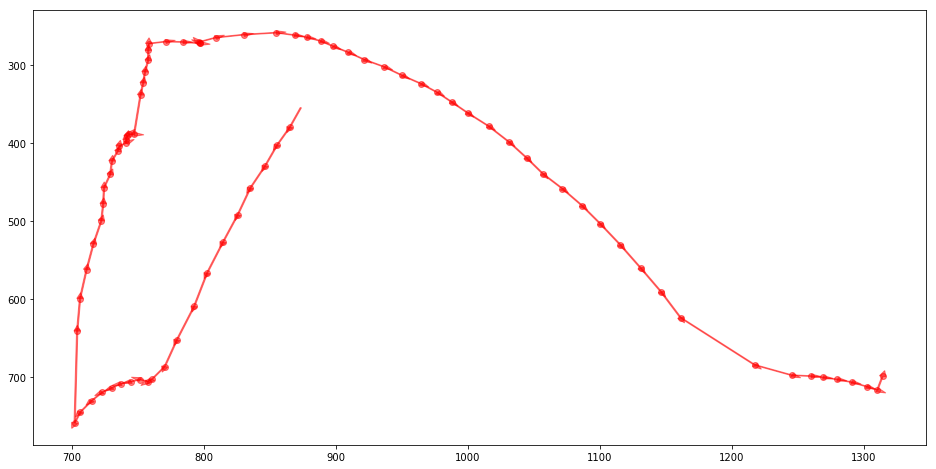

In [12]:
fig = plt.figure(figsize=(16,8))
k = 600
oldrow = ballpos[k-1]
oldsmpos = ballpos[k-1]
for i, row in enumerate(ballpos[k:700]):
    #plt.scatter(row[1], row[2])
    if row[3] >= 0:
        #plt.scatter(row[1], row[2], c='b', alpha=.5)
        #plt.arrow(oldrow[1], oldrow[2], row[1]-oldrow[1], row[2]-oldrow[2], 
        #          width=0.1, head_width=0.5, color='b', alpha=0.5)
        oldrow = row.copy()
        #print(np.where(smpos[:, 0] == row[0]))
        val = np.where(smpos[:, 0] == row[0])
        print(val)
        if len(val[0]) > 0:
            plt.scatter(smpos[int(val[0]), 1], smpos[int(val[0]),2], c='r', alpha=0.5)
            plt.arrow(oldsmpos[1], oldsmpos[2], smpos[int(val[0]),1]-oldsmpos[1], smpos[int(val[0]),2]-oldsmpos[2],
                        width=1, head_width=5, color='r', alpha=0.5)
            oldsmpos = smpos[int(val[0])].copy()
plt.gca().invert_yaxis()
plt.show()

In [207]:
#calculate line through two points
def reg(points):
    reg = linear_model.LinearRegression()
    reg.fit(points[:,0].reshape(-1,1), points[:,1].reshape(-1,1))
    return reg.coef_, reg.intercept_, reg.score(points[:,0].reshape(-1,1), points[:,1].reshape(-1,1))

#calulate angular between two lines
def angular(r1, r2): # r1, r2 direction vectors of line
    try:
        alphaRad = math.acos(np.dot(r1, r2) / (np.linalg.norm(r1) * np.linalg.norm(r2)))
        alpha = math.degrees(alphaRad)
        return alpha
    #In case lines are (almost) parallel
    except ValueError:
        return 0

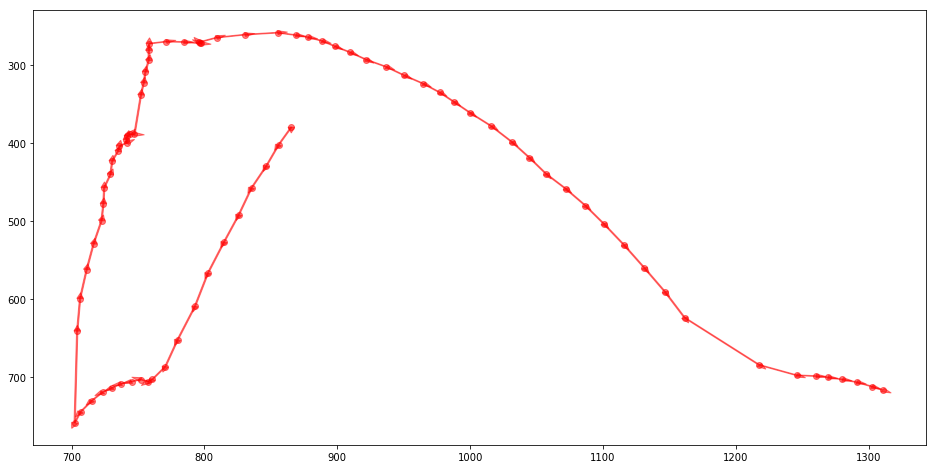

In [20]:
fig = plt.figure(figsize=(16,8))
k = 1
oldrow = testpos[k-1]
oldsmpos = testpos[k-1]
for i, row in enumerate(testpos):
    plt.scatter(testpos[i, 1], testpos[i,2], c='r', alpha=0.5)
    plt.arrow(oldsmpos[1], oldsmpos[2], testpos[i,1]-oldsmpos[1], testpos[i,2]-oldsmpos[2],
                width=1, head_width=5, color='r', alpha=0.5)
    x = np.linspace()
    plt.line()
    oldsmpos = testpos[i].copy()
plt.gca().invert_yaxis()
plt.show()

In [197]:
def distReg(point, regvars):
    #print(point, regvars)
    res = [abs(point[0] * regression[reg][0] + regression[reg][1] - point[1]) for reg in regvars]
    #print(res, np.argmin(res), regvars)
    return regvars[np.argmin(res)]

def newReg(point, regvars):
    regvars = regvars[0:1]
    idx = [np.where(points == np.int64(regnum))[0] for regnum in regvars]
    slon1, intn1, scn1 = reg(testpos[np.append(idx[0], idx[1][0]), 1:3])
    slon2, intn2, scn2 = reg(testpos[idx[1:], 1:3])
    slon3, intn3, scn3 = reg(testpos[idx[0][:-1], 1:3])
    slon4, intn4, scn4 = reg(testpos[np.append(idx[0][-1], idx[1]), 1:3])
    if scn1+scn2 < regression[regvars[0], 3]+regression[regvars[1], 3]:
        return regvars[0]
    elif scn3+scn4 < regression[regvars[0], 3]+regression[regvars[1], 3]:
        return revars[1]
    
def reg(points):
    reg = linear_model.LinearRegression()
    reg.fit(points[:,0].reshape(-1,1), points[:,1].reshape(-1,1))
    return reg.coef_, reg.intercept_, reg.score(points[:,0].reshape(-1,1), points[:,1].reshape(-1,1))

points1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#reg(testpos[points1,1:3])
reg(testpos[points1[0:-1],1:3])

In [324]:
testpos = smpos[300:400]
eps = 0.5
regression = [] # Werte der i-ten Regressionsgeraden
points = [] # Index der zugehörigen Regressionsgerade von Punkt
initnumpoints = 10

# Initialize linear regression
regnum = 0
while regnum*initnumpoints+initnumpoints <= len(testpos):
    #print(regnum*initnumpoints, regnum*initnumpoints+initnumpoints)
    v2 = min(regnum*initnumpoints+initnumpoints, len(testpos))
    slo1, int1, sc1 = reg(testpos[regnum*initnumpoints:v2, 1:3])
    regression += [slo1[0,0], int1[0], sc1]
    points += initnumpoints * [regnum]
    regnum += 1
regression = np.array(regression).reshape(-1, 3)
points += (len(testpos)-len(points)) * [points[-1]]
points = np.array(points)

<IPython.core.display.Javascript object>


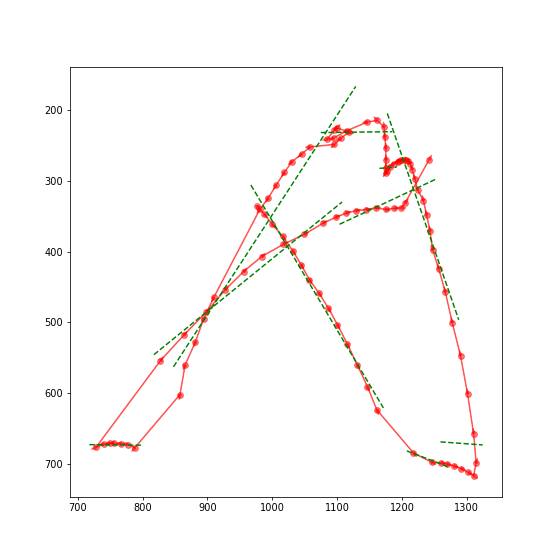

In [294]:
fig = plt.figure(figsize=(8,8))
k = 1
oldrow = testpos[k-1]
oldsmpos = testpos[k-1]
for i, row in enumerate(testpos):
    plt.scatter(testpos[i, 1], testpos[i,2], c='r', alpha=0.5)
    plt.arrow(oldsmpos[1], oldsmpos[2], testpos[i,1]-oldsmpos[1], testpos[i,2]-oldsmpos[2],
                width=1, head_width=5, color='r', alpha=0.5)
    oldsmpos = testpos[i].copy()

for num, i in enumerate(regression):
    index = np.where(points == np.int64(num))
    if len(index[0]) > 1:
        #print(min(testpos[index[0], 1]), max(testpos[index[0], 2]))
        x = np.linspace(min(testpos[index[0], 1])-10, max(testpos[index[0], 1])+10,10)
        #print(x)
        y = [u*i[0]+i[1] for u in x]
        plt.plot(x,y,'g--')

plt.gca().invert_yaxis()
plt.show()

In [205]:
# Initialize linear regression
testpos = smpos
eps = 0.5
regression = [] # Werte der i-ten Regressionsgeraden
points = [] # Index der zugehörigen Regressionsgerade von Punkt
initnumpoints = 10

# Initialize linear regression
regnum = 0
while regnum*initnumpoints+initnumpoints <= len(testpos):
    #print(regnum*initnumpoints, regnum*initnumpoints+initnumpoints)
    v2 = min(regnum*initnumpoints+initnumpoints, len(testpos))
    slo1, int1, sc1 = reg(testpos[regnum*initnumpoints:v2, 1:3])
    regression += [slo1[0,0], int1[0], sc1]
    points += initnumpoints * [regnum]
    regnum += 1

regression = np.array(regression).reshape(-1, 3)
points += (len(testpos)-len(points)) * [points[-1]]

    '''
    fig = plt.figure(figsize=(8,8))
    k = 1
    oldrow = testpos[k-1]
    oldsmpos = testpos[k-1]
    for i, row in enumerate(testpos):
        plt.scatter(testpos[i, 1], testpos[i,2], c='r', alpha=0.5)
        plt.arrow(oldsmpos[1], oldsmpos[2], testpos[i,1]-oldsmpos[1], testpos[i,2]-oldsmpos[2],
                    width=1, head_width=5, color='r', alpha=0.5)
        oldsmpos = testpos[i].copy()

    for num, i in enumerate(regression):
        index = np.where(points == np.int64(num))
        if len(index[0]) > 1:
            #print(min(testpos[index[0], 1]), max(testpos[index[0], 2]))
            x = np.linspace(min(testpos[index[0], 1])-10, max(testpos[index[0], 1])+10,10)
            #print(x)
            y = [u*i[0]+i[1] for u in x]
            plt.plot(x,y,'g--')

    plt.gca().invert_yaxis()
    plt.show()
    '''

TypeError: 'numpy.ndarray' object is not callable

In [188]:
# Initialize linear regression
testpos = smpos
eps = 0.5
regression = [] # Werte der i-ten Regressionsgeraden
points = [] # Index der zugehörigen Regressionsgerade von Punkt
initnumpoints = 10

# Initialize linear regression
regnum = 0
while regnum*initnumpoints+initnumpoints <= len(testpos):
    #print(regnum*initnumpoints, regnum*initnumpoints+initnumpoints)
    v2 = min(regnum*initnumpoints+initnumpoints, len(testpos))
    slo1, int1, sc1 = reg(testpos[regnum*initnumpoints:v2, 1:3])
    regression += [slo1[0,0], int1[0], sc1]
    points += initnumpoints * [regnum]
    regnum += 1

regression = np.array(regression).reshape(-1, 3)
points += (len(testpos)-len(points)) * [points[-1]]
err = 1
change = True
while change:
    #print(points)
    #print(regression)
    # Abstand von Punkt zu Nachbarregressionsgerade
    change = False
    for i, point in enumerate(testpos):
        #print(i, point, len(points))
        #r = regression[points[i]]
        #print(i, points)
        if len(np.where(points == points[i])[0]) > 5:
            regvars = [max(0,points[i]-1), points[i], min(len(regression)-1, points[i]+1)]
        #print(regvars)
            newreg = distReg(point[1:3], regvars)
            if points[i] != newreg: 
                change = True
        #print(points[i], newreg)
            points[i] = newreg
    
    # Regression durch neue Punkte berechnen
    for i in np.unique(points):
        index = np.where(points == i)
        #print(points, i, type(i), index)
        #print(index)
        slo1, int1, sc1 = reg(testpos[index[0], 1:3])
        regression[i] = [slo1, int1, sc1]
    err = np.sum(regression[:,2])
    print(err)
    '''
    fig = plt.figure(figsize=(8,8))
    k = 1
    oldrow = testpos[k-1]
    oldsmpos = testpos[k-1]
    for i, row in enumerate(testpos):
        plt.scatter(testpos[i, 1], testpos[i,2], c='r', alpha=0.5)
        plt.arrow(oldsmpos[1], oldsmpos[2], testpos[i,1]-oldsmpos[1], testpos[i,2]-oldsmpos[2],
                    width=1, head_width=5, color='r', alpha=0.5)
        oldsmpos = testpos[i].copy()

    for num, i in enumerate(regression):
        index = np.where(points == np.int64(num))
        if len(index[0]) > 1:
            #print(min(testpos[index[0], 1]), max(testpos[index[0], 2]))
            x = np.linspace(min(testpos[index[0], 1])-10, max(testpos[index[0], 1])+10,10)
            #print(x)
            y = [u*i[0]+i[1] for u in x]
            plt.plot(x,y,'g--')

    plt.gca().invert_yaxis()
    plt.show()
    '''

872.938194203


In [189]:
#calculate line through two points
def l(p1,p2):
    return p2-p1

def reg(points):
    reg = linear_model.LinearRegression()
    reg.fit(points[:,0].reshape(-1,1), points[:,1].reshape(-1,1))
    return reg.coef_, reg.intercept_, reg.score(points[:,0].reshape(-1,1), points[:,1].reshape(-1,1))

#calulate angular between two lines
def angular(r1, r2): # r1, r2 direction vectors of line
    try:
        alphaRad = math.acos(np.dot(r1, r2) / (np.linalg.norm(r1) * np.linalg.norm(r2)))
        alpha = math.degrees(alphaRad)
        return alpha
    #In case lines are (almost) parallel
    except ValueError:
        return 0

In [190]:
cpreg = np.zeros(len(ballpos))
ang = np.zeros(len(ballpos))
#plt.figure()
nump = 0
jump = 0
pk = 0

In [191]:
import matplotlib as mpl
import matplotlib.pyplot as plt

for i in range(len(regression)):
    slo1, int1, sc1 = regression[i]
    slo2, int2, sc2 = regression[i+1]
    print(slo1, int1, sc1)
    x1, x2 = 1, 1
    '''
    valr1 = np.where(points == np.int64(i))
    valr2 = np.where(points == np.int64(i+1))
    val1 = smpos[i-jump,1:3] - smpos[i-jump-nump+1,1:3]
    if val1[0] < 0 and val1[1] < 0:
        slo1[0, 0] *= -1
        x1 = -1
    if val1[0] < 0 and val1[1] > 0:
        slo1[0, 0] *= -1
        x1= -1

    val2 = smpos[i+jump+nump-1,1:3] - smpos[i+jump,1:3]
    if val2[0] < 0 and val2[1] < 0:
        slo2[0, 0] *= -1
        x2 = -1
    if val2[0] < 0 and val2[1] > 0:
        slo2[0, 0] *= -1
        x2 = -1
    '''
    #calculate angle if except lines are parallel
    # 2-bounce, 1-hit
    alpha = angular([x1,slo1], [x2,slo2])
    ang[i] = alpha
    
    #Distinguish between bounce and hit
    valr1 = np.where(points == np.int64(i))
    valr2 = np.where(points == np.int64(i+1))
    #print(valr1[0][-1], valr2)
    try:
        if alpha > 30 and sc1 > 0.6 and sc2 > 0.6:
            r1 = sum(smpos[valr1[0], 1:3] - smpos[valr1[0][-1], 1:3])
            r2 = sum(smpos[valr2[0], 1:3] - smpos[valr2[0][0], 1:3])
            # If sign similar hit (1, red), otherwise bounce (2, green)
            if np.sign(r1[0]) != np.sign(r2[0]) and np.sign(r1[1]) != np.sign(r2[1]):
                cpreg[i] = 2
            else:
                cpreg[i] = 1
    except IndexError:
        print('IE')

    #check if serve
    #cond1 = val1[1] < val2[1]
    #slo2, int2, sc2 = reg(smpos[i+jump:i+jump+nump, 1:3])
    #if cond1 and  abs(slo1) > 8 and abs(slo2) > 8:
    #    cpreg[i] = 3
    

-0.170939717599 598.836236139 0.785457401008
-0.0668744899421 485.481688954 0.326400557098
-0.724161918715 1320.64297159 0.970077314381
-1.07280661132 1693.16059605 0.428662725637
-0.452860313752 1032.20697735 0.170826048709
2.13632607469 -1740.47653186 0.738979373092
-9.37610380461 8562.70779443 0.816595871403
1.4857638753 -1187.03714927 0.840813218729
0.619114081951 -132.025902128 0.921771297977
0.974902745097 -561.006382985 0.998711983834
0.290048196662 118.313019295 0.827993788336
1.60521755006 -884.728431761 0.9842108778
0.765807668695 -327.109625235 0.947613735497
1.35207949179 -797.1330061 0.970217219323
7.17883542097 -7886.31316242 0.98974937674
2.24632683824 -2222.74574578 0.800133180355
6.31290692596 -6712.41223538 0.734142707818
0.221294409977 -28.594011358 0.0434309924196
-2.55605648241 2829.45253105 0.988826920378
-0.633080597245 1204.47459425 0.713837237632
-3.22278668098 3242.2254319 0.994209388086
-1.33500351335 1594.69670365 0.981512313168
-4.32527541944 4471.62505054 

0.445200377068 -156.692869061 0.83576304587
3.80484899133 -3081.09069053 0.960570871102
0.180363683901 23.0256781245 0.0727474009434
0.334110155501 -83.3914644569 0.989166065172
2.18692631354 -2091.06375824 0.982229275936
0.773661807941 -384.234148077 0.260224877626
0.748693332424 -791.832191986 0.990156336531
0.344683899537 -23.5834244002 0.653502773597
-1.78579693858 2095.9488829 0.410486967915
2.96739724246 -2600.66444509 0.504686794096
0.108714878788 -4.30713064306 0.554619364686
-0.0639831033838 600.126273734 0.0118100948488
0.0614704584948 399.995813461 0.00944020123458
-0.709298875175 1155.8591937 0.93758351947
-1.20186857397 1524.80951451 0.99130875473
-0.41734738599 818.283407468 0.885444915995
-1.64587896558 2212.83197762 0.980856624594
-1.78867416223 2323.3340521 0.341816040729
-1.32956227525 1706.24815094 0.942489677305
-0.741424540814 1187.40006613 0.443324895142
-1.14539508048 1381.92662837 0.99262598014
-0.0969965783927 392.650814807 0.10384646559
-0.769583194157 1073.61

1.13442917152 -714.42685148 0.676675508811
1.0496412418 -766.878324951 0.971068495172
-0.399276492687 652.874525505 0.804216927999
2.73173716415 -2162.02181073 0.906832741025
0.749803387353 -460.210116775 0.975692267244
1.48142847338 -1190.54767446 0.991047530142
1.24350781948 -960.490360827 0.900357317165
0.357609426291 -2.62199526796 0.905125867417
1.08532765713 -570.295239541 0.896197453974
0.595952160561 -233.867135602 0.773296200814
-1.73783502345 1374.32216105 0.895694415929
-4.91812254157 3449.6915445 0.967735516307
-1.37684230923 1308.62126037 0.388421754218
-0.383927482534 713.256565496 0.658709882571
-0.18030575056 535.602432546 0.815044301587
0.0736291054749 279.015355899 0.0635961383724
-4.56930624381 6290.41755288 0.99682758224
-0.51179838497 1323.78593504 0.564526236267
4.46355051131 -4364.07799934 0.940109287281
3.2858292729 -3130.1678299 0.995781005471
2.00528778616 -1839.86168736 0.905657144447
-2.28067084127 2320.30724576 0.953325974291
2.38603672628 -2020.8762344 0.9

0.269301633407 -34.0701348364 0.118323538709
1.10287379569 -962.135556669 0.728902862283
2.13711971242 -2258.35581419 0.973471669607
0.294368077126 345.177822663 0.814891487947
0.0780811645438 440.928605627 0.116955063303
-0.880636300959 911.443324272 0.957511152549
-0.469115326367 708.995154355 0.35846243891
-0.343534457869 646.069079831 0.382292906936
0.182129154141 385.785178265 0.0417980892359
-0.521570607495 733.847914307 0.485163101918
0.0280338094113 465.821865346 0.0159970121993
0.0854966671843 444.319976818 0.052040644644
-0.120089516456 603.123980643 0.0657309354958
9.72717321756 -6725.54039026 0.834300713041
-5.2109554295 4114.72512968 0.522336696135
0.525722002637 61.8623926028 0.0547117339578
-0.46747468821 798.3316022 0.857837121875
-5.55249754014 5825.04256787 0.715085090447
8.87501651186 -8643.3172582 0.0974586958161
-0.237675645479 432.955598644 0.894363408279
-1.28617005042 1363.59906931 0.987772335954
-1.34828881084 1446.99049558 0.908591569342
-0.796572533014 1055.9

-1.23435946997 1278.62198377 0.987461764605
0.645140750986 -400.636015619 0.74394206284
3.39167988482 -3396.6116611 0.989859164146
-0.766017113638 1586.3543553 0.967387241008
0.460955629992 159.919561875 0.90345904218
0.319752561767 169.416836607 0.216936673271
0.205338525251 176.142104469 0.413807772381
-1.08280874513 1563.26787393 0.306213990284
-2.44239486572 2628.26084216 0.998389658355
-0.0894281343055 236.388640718 0.475634354107
3.58578621935 -3723.41542531 0.839934525196
-15.2807795869 17269.4266991 0.576395770196
2.55978349295 -2707.96494505 0.988851276394
3.02856686185 -3252.29674785 0.973084730537
1.02255692246 -625.779729295 0.462509614029
-0.355587454049 1294.0632083 0.755882088724
-0.884942174038 2134.35769661 0.964825913579
-0.229306984138 507.009314595 0.400384571016
-0.861029592528 1219.89002922 0.813145556521
0.124673821979 77.5894996329 0.0898845214052
-0.583112897543 898.820704144 0.882016597359
-0.571721825571 939.216433528 0.894156232497
-1.57750884429 1993.786530

11.6832298175 -13339.7927153 0.963707156913
8.36883020052 -9483.17448718 0.840234628378
-1.25936336317 1675.71127408 0.99798369341
-3.02870440973 3551.42592774 0.485491939767
-1.40982705941 1830.66318991 0.966498302655
-0.45861773146 710.048972603 0.363013533499
-0.297168787309 531.410338489 0.0734616385428
-1.28166772376 1582.0688048 0.879733809926
-2.18469121546 2562.76625311 0.974687342941
-2.33571855465 2743.79587004 0.935687908047
0.191191024267 311.864152858 0.271092928381
-0.492244304638 948.361672265 0.968842623567
0.291790263878 273.722582387 0.110122272849
5.03555017916 -3716.04817509 0.990864628194
3.50773954869 -2508.78107137 0.808081857245
2.03978829474 -1377.05548842 0.91493115254
-1.07401906208 1032.69173317 0.417600413552
-0.0680481618862 268.57691477 0.189277233714
-0.632208281649 682.929570186 0.742593145449
2.66229806267 -1869.33417843 0.460481894221
4.40629013307 -3272.08426078 0.13414228624
2.85697659266 -2135.17351964 0.991369922153
3.84325674592 -3161.30658018 0.

IndexError: index 1262 is out of bounds for axis 0 with size 1262

In [ ]:
smpos_backup = smpos

<IPython.core.display.Javascript object>


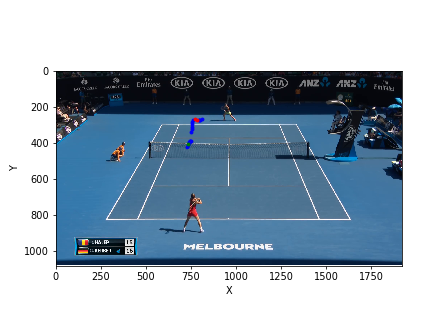

In [192]:
%matplotlib notebook

smpos = testpos
imgpath = os.path.join(os.getcwd(), '../../Videos/GoPro/GoProFrames/3_image_GP_' + str(int(ballpos[1,0])).zfill(5) +'.png')
img = plt.imread(imgpath)

fig,ax = plt.subplots(1,1)
plt.imshow(img)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1920)
ax.set_ylim(0,1080)
scatter, = ax.plot([], [], 'b.')
cmap = ['b', 'r', 'g', 'y']
#scatter = []
scatter = [ax.imshow(img)]
for c in cmap:
    scatter.append(ax.plot([], [], '.', color=c))

#scatter.append(ax.text([],[],[]))
#for scat in scatter[1:]:
#    print(scat[0])
#    scat[0].set_data([],[])
#scatter[0].set_data(img)
#print(scatter[0])

def init():
    for scat in scatter[1:]:
        print(scat[0])
        scat[0].set_data([],[])
    scatter[0].set_data(img)
    return scatter

def pltpos(i):
    i += 310
    npoi = 20
    imgpath = os.path.join(os.getcwd(), '../../Videos/GoPro/GoProFrames/3_image_GP_' + str(int(ballpos[i,0])).zfill(5) +'.png')
    #'/home/mueller/code/python/Anwendungspraktikum/Videos/GoPro/GoProFrames/3_image_GP_00306.png'
    img = plt.imread(imgpath)
    j = np.where(smpos[:,0] == int(ballpos[i,0]))
    if len(j[0]) > 0:
        vals = [k+int(j[0]) for k,x in enumerate(smpos[int(j[0]):int(j[0])+npoi, 3]) if x > 0.03]
        blue = [k for k in vals if cpreg[k] == 0]
        red = [k for k in vals if cpreg[k] == 1]
        green = [k for k in vals if cpreg[k] == 2]
        pink = [k for k in vals if cpreg[k] == 3]
        x = smpos[blue,1]
        y = smpos[blue,2]
        x1 = smpos[red, 1]
        y1 = smpos[red, 2]
        x2 = smpos[green, 1]
        y2 = smpos[green, 2]
        x3 = smpos[pink, 1]
        y3 = smpos[pink, 2]
        xlist = [x, x1, x2, x3]
        ylist = [y, y1, y2, y3]
        for lnum, scat in enumerate(scatter[1:]):
            scat[0].set_data(xlist[lnum], ylist[lnum])
    else:
        for lnum, scat in enumerate(scatter[1:]):
            scat[0].set_data([0],[0])
    scatter[0].set_data(img)
    print(i, imgpath, j[0])
    return scatter

#for i in range(100,200):
#    pltpos(i)

ani = animation.FuncAnimation(fig, pltpos, init_func=init, frames=20000, interval=200, blit=True)
plt.gca().invert_yaxis()
plt.show()